In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_1_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_1_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 1
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_1_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_TO_TB_ORI, pb_TO_TB, pb_TO_TB_ERRORS, pb_SD, pb_SD_ERRORS = TO_TBmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Accuracy on data that trained the model: 0.754132172761247
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.7343582950943753
Prediction accuracy of synthetic data: 0.7340744595297791
Prediction accuracy of synthetic data: 0.7341217654572118
Prediction accuracy of synthetic data: 0.7334689436586405
Prediction accuracy of synthetic data: 0.7343772174653485
TO-TB accuracy difference with same training data: 0.020052036520175953 with standard deviation: 0.0003289228453590508
Support Distance not applicable
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.6303798665972846
Prediction accuracy of synthetic data: 0.6374946780831638
Prediction accuracy of synthetic data: 0.6303893277827712
Prediction accuracy of synthetic data: 0.630

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 24
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.013058463368317192
TO-TB accuracy difference with same training data: 0.10557736884431623 with standard deviation: 0.0018128678215496659
Prediction accuracy of synthetic data: 0.5182837409527413
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 24
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.02178167638690843
Prediction accuracy of synthetic data: 0.5158238327262405
total n

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 10
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.03065761997121097
stage_2A present in

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_TO_TB_ORI, ms_TO_TB, ms_TO_TB_ERRORS, ms_SD, ms_SD_ERRORS = TO_TBmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Accuracy on data that trained the model: 0.754132172761247
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.5098916694261791
Prediction accuracy of synthetic data: 0.5120015137896778
Prediction accuracy of synthetic data: 0.5111878518378353
Prediction accuracy of synthetic data: 0.5155210747906712
Prediction accuracy of synthetic data: 0.5119542078622451
TO-TB accuracy difference with same training data: 0.24202090921992525 with standard deviation: 0.0018677693358987195
Support Distance not applicable
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
Prediction accuracy of synthetic data: 0.5143384266048536
diagnosis_age_0-20 present in original data, thus added to synthetic data with value 0
Prediction accuracy of synthetic data: 0.512947632338332
Prediction accura

total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 24
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.010264034654970836
Prediction accuracy of synthetic data: 0.5011116892946686
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 24
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.010423523210315398
Prediction accuracy of synthetic data: 0.5036945929324944
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 24


Prediction accuracy of synthetic data: 0.4971852973177539
diagnosis_age_0-20 present in original data, thus added to synthetic data with value 0
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 14
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
Support distance: 0.026066241814385056
TO-TB accuracy difference with same training 

Prediction accuracy of synthetic data: 0.6698897771890818
subloc_0 present in original data, thus added to synthetic data with value 0
subloc_3 present in original data, thus added to synthetic data with value 0
subloc_9 present in original data, thus added to synthetic data with value 0
stage_2C present in original data, thus added to synthetic data with value 0
stage_3C present in original data, thus added to synthetic data with value 0
stage_4B present in original data, thus added to synthetic data with value 0
diagnosis_age_21-50 present in original data, thus added to synthetic data with value 0
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 4
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node

Prediction accuracy of synthetic data: 0.6596054685652112
subloc_3 present in original data, thus added to synthetic data with value 0
subloc_5 present in original data, thus added to synthetic data with value 0
subloc_6 present in original data, thus added to synthetic data with value 0
stage_3A present in original data, thus added to synthetic data with value 0
stage_3C present in original data, thus added to synthetic data with value 0
stage_4A present in original data, thus added to synthetic data with value 0
stage_4C present in original data, thus added to synthetic data with value 0
diagnosis_age_21-50 present in original data, thus added to synthetic data with value 0
total number of samples is: 105695
total number of ori rules is: 28
total number of rules that syn follows from ori are: 4
Both datasets use the same leaf nodes: False
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reached by synthetic dataset
leaf node not reac

In [12]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

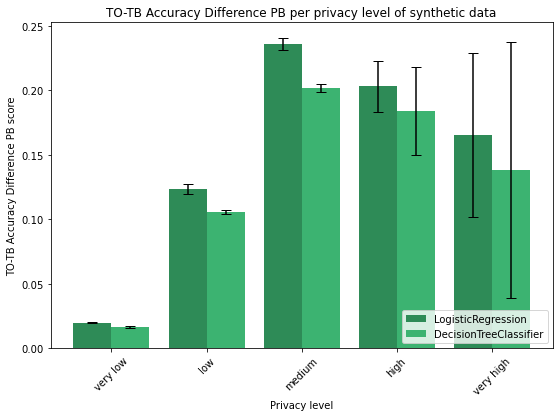

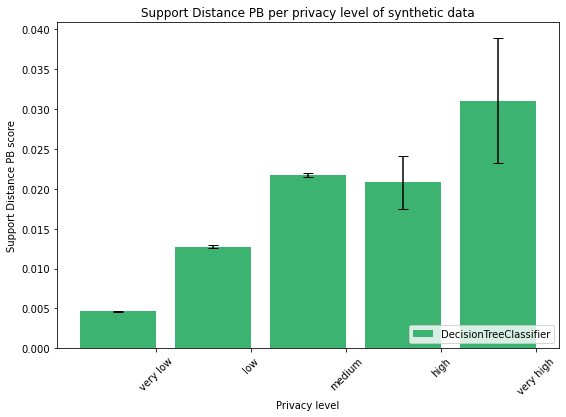

In [13]:
QMbar_one_DP_alg(QM=pb_TO_TB, QMerror = pb_TO_TB_ERRORS, QMname='TO-TB Accuracy Difference PB', labels=labels)
QMbar_one_DP_alg(QM=pb_SD, QMerror = pb_SD_ERRORS, QMname='Support Distance PB', labels=labels)

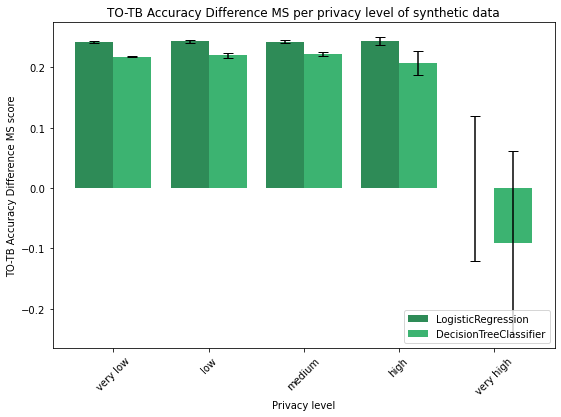

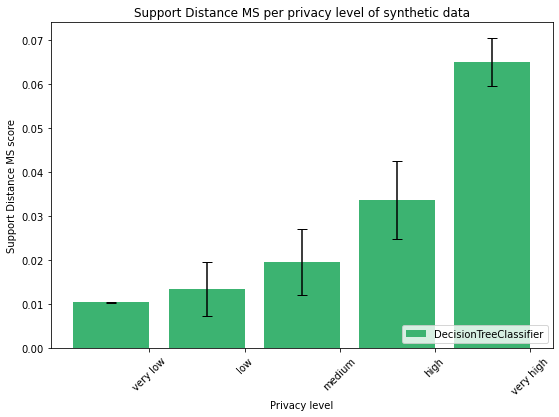

In [14]:
QMbar_one_DP_alg(QM=ms_TO_TB, QMerror = ms_TO_TB_ERRORS, QMname='TO-TB Accuracy Difference MS', labels=labels)
QMbar_one_DP_alg(QM=ms_SD, QMerror = ms_SD_ERRORS, QMname='Support Distance MS', labels=labels)

# Combined visualization

In [15]:
QM_TO_TB_ori = ms_TO_TB_ORI+pb_TO_TB_ORI
QM_TO_TB = ms_TO_TB+pb_TO_TB
QM_TO_TB_error = ms_TO_TB_ERRORS+pb_TO_TB_ERRORS

QM_SD = ms_SD+pb_SD
QM_SD_error = ms_SD_ERRORS+pb_SD_ERRORS

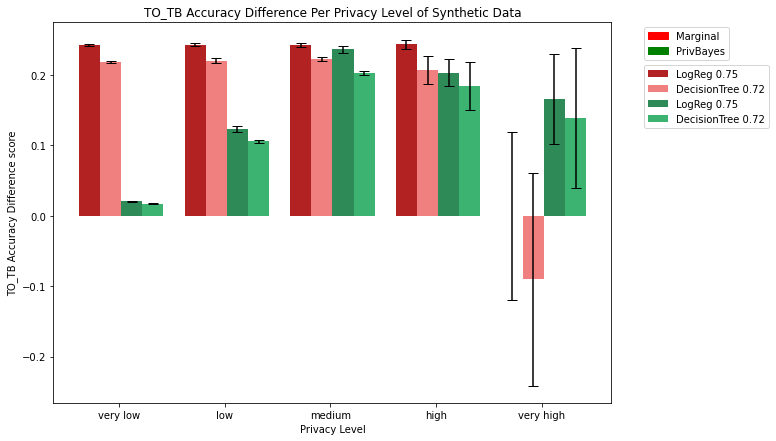

2


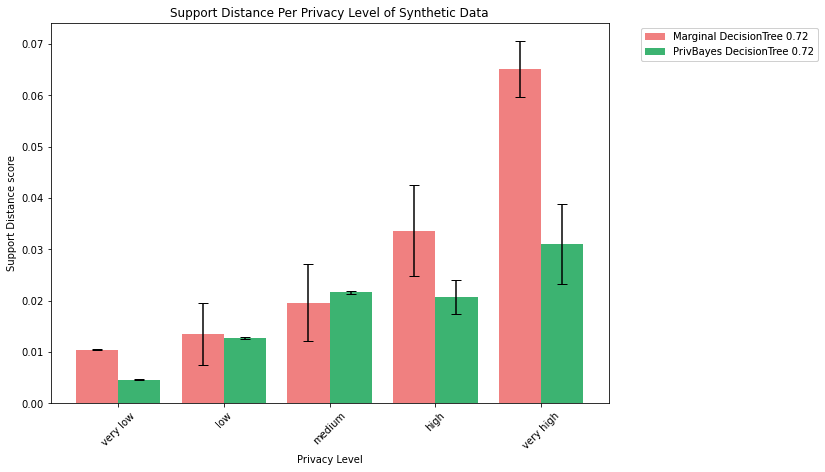

In [16]:
fig1 = QMbar_two_DP_algs(QM=QM_TO_TB, QMerror = QM_TO_TB_error, QMname='TO_TB Accuracy Difference', QMori = QM_TO_TB_ori, labels=labels)
fig1.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result TO_TB Accuracy Difference-subset_1.png', bbox_inches='tight', dpi=100)

fig2 = SupportDistancebar(QM=QM_SD, QMerror = QM_SD_error, QMname='Support Distance', QMori = QM_TO_TB_ori, labels=labels)
fig2.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Support Distance-subset_1.png', bbox_inches='tight', dpi=100)